# Audio Exploration

In [6]:
import os
import sys
import IPython.display as ipd
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

sys.path.append(os.path.abspath(os.path.join('../scripts')))

from audio_explorer import AudioExplorer


In [7]:
ae = AudioExplorer(directory='../data/train')


AudioExplorer:INFO->Successfully Created AudioExplorer Class
AudioExplorer:INFO->Successfully Loaded Audio and TTS files


## Get Information Dataframe

In [8]:
info_df = ae.get_audio_info()
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             1000 non-null   object 
 1   Channel          1000 non-null   object 
 2   Duration(sec)    1000 non-null   float64
 3   Frequency(Hz)    1000 non-null   int64  
 4   ZeroCrossings    1000 non-null   int64  
 5   MinAmplitude     1000 non-null   float64
 6   MaxAmplitude     1000 non-null   float64
 7   AmplitudeMean    1000 non-null   float64
 8   AmplitudeMedian  1000 non-null   float64
 9   HasTTS           1000 non-null   bool   
dtypes: bool(1), float64(5), int64(2), object(2)
memory usage: 71.4+ KB


In [9]:
# Get a sample of the dataframe
info_df.sample(10)


,Name,Channel,Duration(sec),Frequency(Hz),ZeroCrossings,MinAmplitude,MaxAmplitude,AmplitudeMean,AmplitudeMedian,HasTTS
470,tr_10424_tr23126,Stereo,2.879,16000,16,-0.862,0.713,-0.125,-0.127,True
198,tr_1017_tr11018,Stereo,8.359,16000,3174,-0.215,0.097,-0.021,-0.021,True
214,tr_10194_tr099036,Stereo,5.480,16000,198,-0.397,0.060,-0.125,-0.125,True
800,tr_10721_tr03138,Stereo,2.972,16000,72,-0.651,0.122,-0.125,-0.126,True
750,tr_10677_tr13142,Stereo,4.551,16000,130,-0.801,0.256,-0.125,-0.126,True
277,tr_10250_tr099092,Stereo,2.415,16000,122,-0.381,0.092,-0.125,-0.126,True
823,tr_10742_tr05110,Stereo,6.409,16000,974,-1.000,0.475,-0.125,-0.127,True
467,tr_10421_tr23123,Stereo,2.972,16000,2,-0.511,0.007,-0.125,-0.126,True
80,tr_10073_tr098035,Stereo,2.043,16000,220,-0.379,0.142,-0.125,-0.126,True
860,tr_10776_tr05144,Stereo,1.950,16000,394,-1.000,0.352,-0.124,-0.126,True


<AxesSubplot:title={'center':'Channel Types'}, xlabel='Channel', ylabel='Number of Audio-Files'>

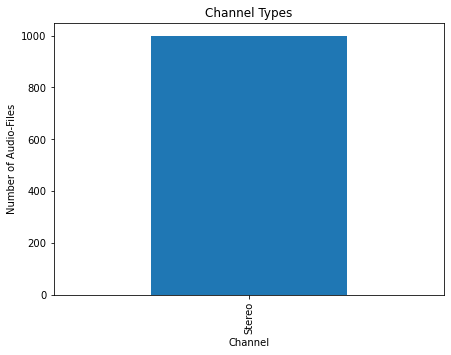

In [10]:
# Check channel types
info_df.Channel.value_counts().plot(kind='bar', title='Channel Types', ylabel='Number of Audio-Files', xlabel='Channel', figsize=(7,5))

<AxesSubplot:title={'center':'Frequency Types'}, xlabel='Frequency', ylabel='Number of Audio-Files'>

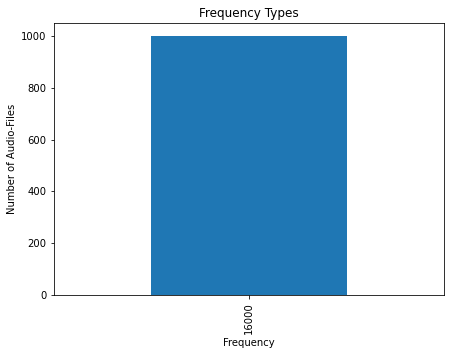

In [11]:
# Check frequency Types
info_df['Frequency(Hz)'].value_counts().plot(kind='bar', title='Frequency Types',
                                    ylabel='Number of Audio-Files', xlabel='Frequency', figsize=(7, 5))


<AxesSubplot:title={'center':'Translation Diagram'}, xlabel='Has Translation', ylabel='Number of Audio-Files'>

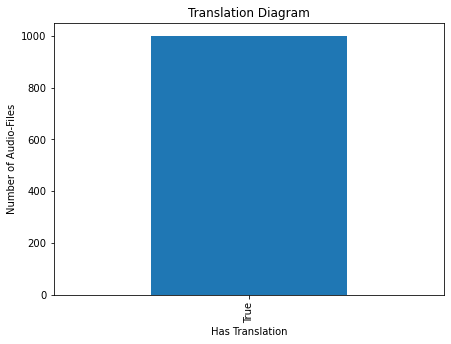

In [12]:
# Check frequency Types
info_df['HasTTS'].value_counts().plot(kind='bar', title='Translation Diagram',
                                             ylabel='Number of Audio-Files', xlabel='Has Translation', figsize=(7, 5))


In [13]:
# Grouping based on duration of audio
bins = pd.cut(info_df['Duration(sec)'], np.arange(
    0, int(max(info_df['Duration(sec)'].tolist())) + 1))
info_df.groupby(bins)['Duration(sec)'].agg(['count', 'sum']).sort_values(by='count', ascending=False)


,count,sum
Duration(sec),,
"(3, 4]",332,1151.721
"(2, 3]",297,765.795
"(4, 5]",152,674.868
"(5, 6]",75,408.303
"(6, 7]",42,272.787
"(1, 2]",34,62.137
"(7, 8]",32,238.516
"(8, 9]",16,136.182
"(9, 10]",11,106.160


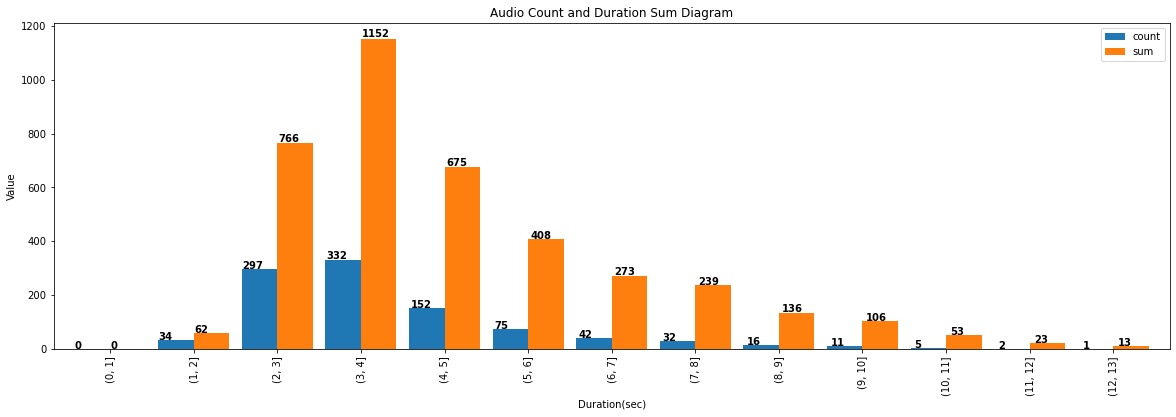

In [14]:

plot = info_df.groupby(bins)['Duration(sec)'].agg(['count', 'sum']).plot(kind='bar', width=0.85, title='Audio Count and Duration Sum Diagram',
                                                                  ylabel='Value', figsize=(20, 6))
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()
                                                   * 1.005, p.get_height() * 1.005), fontweight='bold')


# Add more insight
# Most of the audio data is has a duration between 2 - 7 

## Check the Class for more methods

## Uncomment this things to use the class methods

In [15]:
sample_audio, sr = ae.get_audio_file(0)
ipd.Audio(sample_audio, rate=sr)

In [16]:
# ae.get_tts()

In [17]:
ae.get_audio_info().sample(10)

,Name,Channel,Duration(sec),Frequency(Hz),ZeroCrossings,MinAmplitude,MaxAmplitude,AmplitudeMean,AmplitudeMedian,HasTTS
385,tr_10348_tr100070,Stereo,6.780,16000,68,-0.410,0.052,-0.126,-0.126,True
201,tr_10182_tr099024,Stereo,5.201,16000,84,-0.411,0.087,-0.125,-0.125,True
691,tr_10623_tr04137,Stereo,3.251,16000,175,-0.270,0.052,-0.121,-0.127,True
301,tr_10272_tr099114,Stereo,3.065,16000,334,-0.430,0.093,-0.125,-0.126,True
228,tr_10206_tr099048,Stereo,2.322,16000,28,-0.381,0.058,-0.125,-0.126,True
983,tr_1098_tr11099,Stereo,8.545,16000,288,-0.065,0.011,-0.021,-0.021,True
312,tr_10282_tr100004,Stereo,5.387,16000,164,-0.460,0.120,-0.125,-0.126,True
338,tr_10305_tr100027,Stereo,5.851,16000,3,-0.342,0.003,-0.123,-0.125,True
292,tr_10264_tr099106,Stereo,2.508,16000,260,-0.568,0.179,-0.125,-0.126,True
328,tr_10297_tr100019,Stereo,2.322,16000,102,-0.458,0.142,-0.125,-0.126,True


In [18]:
ae.get_audio_info_with_tts().head(5)


,Name,Channel,Duration(sec),Frequency(Hz),ZeroCrossings,MinAmplitude,MaxAmplitude,AmplitudeMean,AmplitudeMedian,HasTTS,TTS
0,tr_10000_tr097082,Stereo,6.594,16000,2724,-0.751,0.473,-0.125,-0.125,True,የተለያዩ የ ትግራይ አውራጃ ተወላጆች ገንዘባቸው ን አዋጥ ተው የ ልማት ...
1,tr_10001_tr097083,Stereo,4.087,16000,1322,-0.790,0.399,-0.125,-0.126,True,የ ጠመንጃ ተኩስ ተከፈተ ና አራት የኤርትራ ወታደሮች ተገደሉ
2,tr_10002_tr097084,Stereo,4.458,16000,1038,-0.807,0.374,-0.125,-0.126,True,ላነሷቸው ጥያቄዎች የ ሰጡት ን መልስ አቅርበ ነዋል
3,tr_10003_tr097085,Stereo,4.180,16000,1560,-1.000,0.391,-0.125,-0.125,True,እ ብዱ አስፋልቱ ላይ የ ኰለኰ ለ ው ድንጋይ መኪና አላ ሳልፍ አለ
4,tr_10004_tr097086,Stereo,3.901,16000,1156,-0.767,0.388,-0.125,-0.125,True,ጠጁ ን ኰ መኰ መ ኰ መኰ መ ና ሚስቱ ን ሲ ያሰቃ ያት አደረ


<module 'matplotlib.pyplot' from 'C:\\Users\\HP850_G2\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

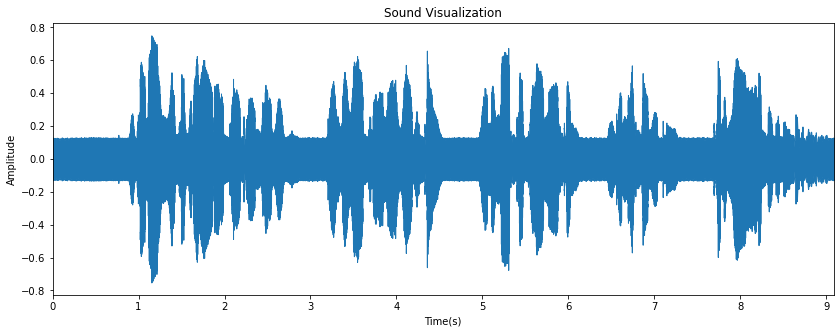

In [19]:
ae.get_audio_visualization(0)

<module 'matplotlib.pyplot' from 'C:\\Users\\HP850_G2\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

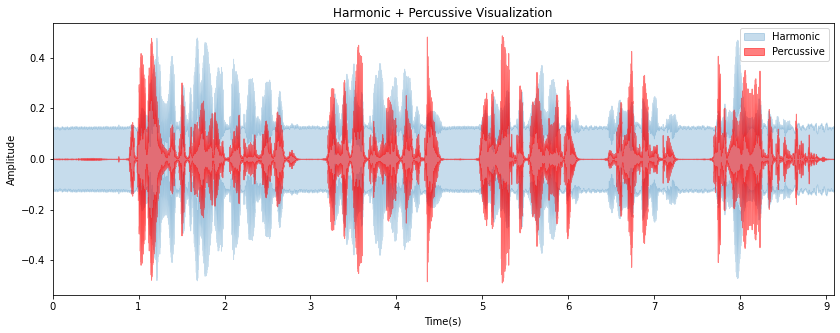

In [20]:
ae.get_harmonic_percussive_visualization(0)


<module 'matplotlib.pyplot' from 'C:\\Users\\HP850_G2\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

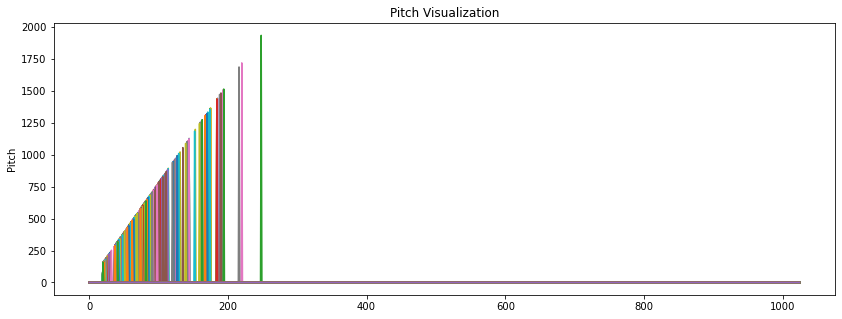

In [21]:
ae.get_pitch_visualization(0)

<module 'matplotlib.pyplot' from 'C:\\Users\\HP850_G2\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

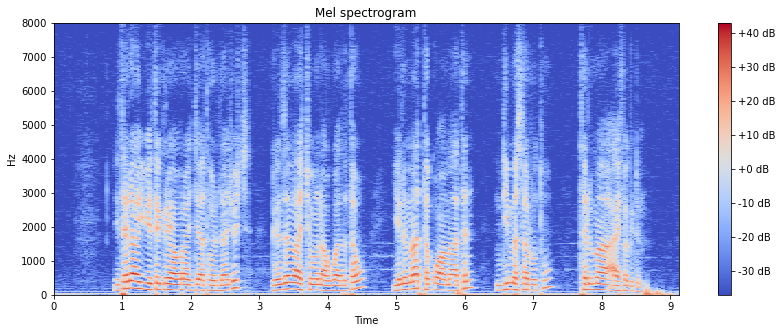

In [22]:
ae.get_spectogram_visualization(0)

<module 'matplotlib.pyplot' from 'C:\\Users\\HP850_G2\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

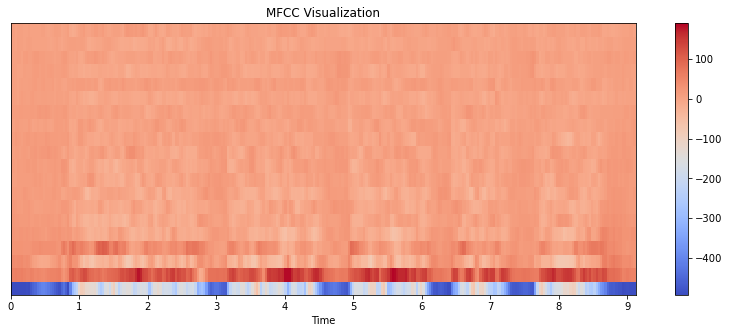

In [23]:
ae.get_mfcc_visualization(0)

<module 'matplotlib.pyplot' from 'C:\\Users\\HP850_G2\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

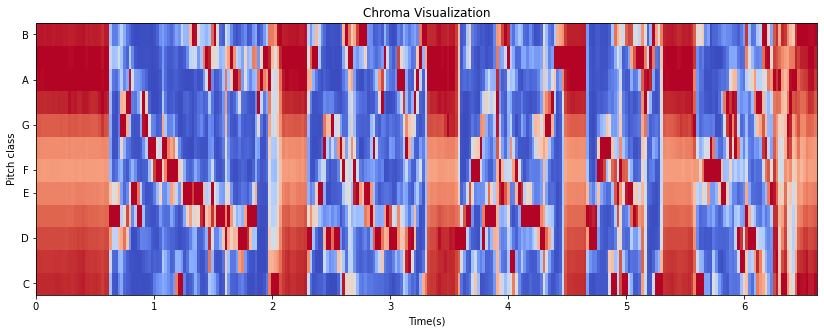

In [24]:
ae.get_chroma_visualization(0)

In [13]:
# ae.export_tts('./trial.json')